<a href="https://colab.research.google.com/github/jeevallucas/Data-Analytics/blob/main/Assessment_3_Putu_Jeevallucas_Jnanamaitriya_Surya_Gautama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTRODUKSI**

This assessment covers Data Science, SQL Database Management, Data Product Development, and making a societal impact. You will use SQL queries to fetch data, Data Science techniques for analysis, and develop a dashboard to showcase your findings.

**DATASET**
- https://github.com/dataenergy/Exploratory-data-analysis-of-climate-change-and-natural-disasters/blob/master/datasets/number-of-natural-disaster-events.csv
- https://github.com/dataenergy/Exploratory-data-analysis-of-climate-change-and-natural-disasters/blob/master/datasets/economic-damage-from-natural-disasters.csv

# **Part 1: SQL Database Setup and Queries**
Persiapan dan Query Database SQL.

## **1.1 Database: SQL Query I**

**PERINTAH**

Import the downloaded dataset into a SQL database, and write an SQL query to fetch `Year` and any relevant variables (e.g., `Number of natural disasters`, `Economic damage`).

### **1. Import the downloaded dataset into a SQL database.**
Buat dua tabel database. Tabel pertama disebut `natural_disasters` dan tabel kedua disebut `economic_damage`.

```sql
CREATE TABLE natural_disasters (
    entity TEXT,
    code TEXT,
    year INTEGER,
    disaster_count INTEGER
);

CREATE TABLE economic_damage (
    entity TEXT,
    code TEXT,
    year INTEGER,
    in_usd BIGINT
);
```

Pastikan paths file CSV yang telah diunduh.

```sql
COPY economic_damage(entity, code, year, in_usd)
FROM 'D:\economic-damage-from-natural-disasters.csv'
DELIMITER ',' CSV HEADER;

COPY natural_disasters(entity, code, year, disaster_count)
FROM 'D:\number-of-natural-disaster-events.csv'
DELIMITER ',' CSV HEADER;
```

### **2. Write an SQL query to fetch Year and any relevant variables (e.g., Number of natural disasters, Economic damage).**
Gunakan `LEFT JOIN` untuk menggabungkan data dari tabel `natural_disasters` dan `economic_damage` berdasarkan kolom `year` dan `entity`. Kemudian, kelompokkan data berdasarkan `year`, `entity`, dan `disaster_count`, serta menghitung jumlah `in_usd` dari tabel `economic_damage`. Terakhir, menyortir hasilnya berdasarkan tahun.

```sql
SELECT
	nd.year,
	nd.entity,
	nd.disaster_count,
	SUM(ed.in_usd) AS total_economic_damage
FROM natural_disasters AS nd
LEFT JOIN
	economic_damage AS ed ON nd.year = ed.year AND nd.entity = ed.entity
GROUP BY
	nd.year,
	nd.entity,
	nd.disaster_count
ORDER BY nd.year
```

Ini akan menampilkan setiap data yang relevan untuk setiap `year` dan `entity`. Menampilkan `disaster_count` yang terjadi pada tahun dari bencana alam tersebut beserta total kerugian keuangannya.

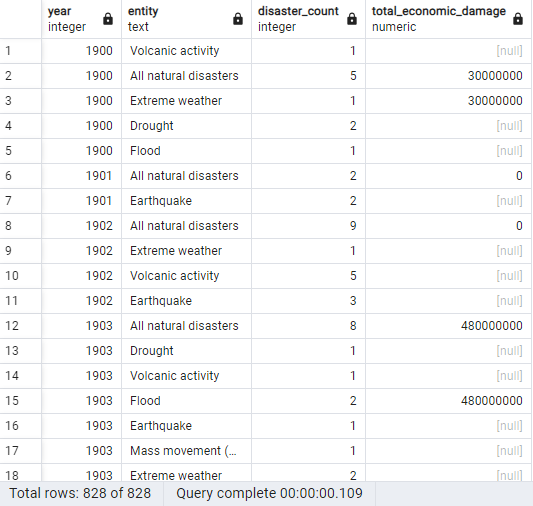

## **1.2 Database: SQL Query II**

**PERINTAH**

Write SQL query to show Total Natural Disaster and Economic Damage for every type of Disaster (Entity), and write an SQL query to summarize the data per 10 year, calculating averages and sums for Natural disaster & Economic damage.

### **1. Write SQL query to show Total Natural Disaster and Economic Damage for every type of Disaster (Entity)**
Gunakan JOIN untuk menggabungkan data dari dua tabel, kelompokkan hasilnya berdasarkan entitas (disaster_type) untuk menghitung total bencana alam dan kerusakan ekonomi.

```sql
SELECT
    nd.entity AS disaster_type,
    SUM(nd.disaster_count) AS total_disasters,
    SUM(ed.in_usd) AS total_economic_damage
FROM
    natural_disasters nd
LEFT JOIN economic_damage ed ON nd.year = ed.year AND nd.entity = ed.entity
GROUP BY nd.entity
ORDER BY total_disasters DESC;
```

Kueri ini akan memberikan jumlah total bencana alam dan kerusakan ekonomi untuk setiap jenis bencana (entity).

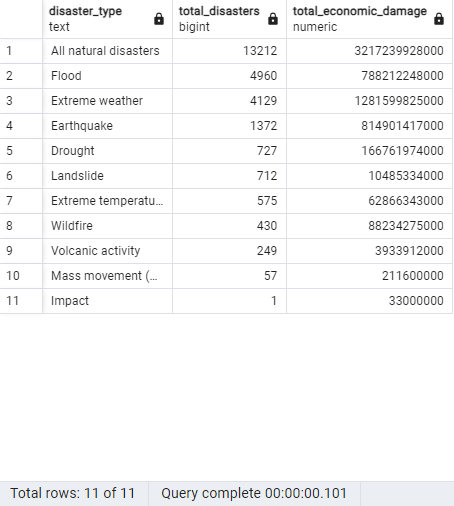

### **2. Write an SQL query to summarize the data per 10 year, calculating averages and sums for Natural disaster & Economic damage.**
Kelompokkan data dalam interval 10 tahun, menghitung rata-rata dan jumlah untuk bencana alam dan kerusakan ekonomi.

```sql
SELECT
    (nd.year / 10) * 10 AS decade,
    ROUND(AVG(nd.disaster_count)::numeric, 2) AS avg_natural_disasters,
    SUM(ed.in_usd) AS total_economic_damage
FROM
    natural_disasters nd
LEFT JOIN economic_damage ed ON nd.year = ed.year
GROUP BY decade
ORDER BY decade;
```

Query ini menghasilkan tabel yang menghitung rata-rata bencana alam dan total kerusakan ekonomi per dekade, memberikan ringkasan data.

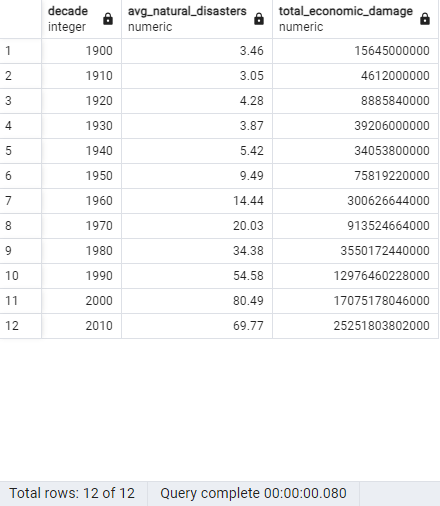

# **Part 2: Data Science and Statistical Analysis.**

Data Science dan Analisis Statistik.

Mengacu pada kerangka tugas sebelumnya untuk latihan tentang Statistik Deskriptif dan Inferensial, EDA, dan Pemodelan Statistik.

## **Descriptive and Inferential Statistics**

Statistik deskriptif dan inferensial adalah alat penting dalam analisis data untuk memahami dan menyimpulkan dari kumpulan data. Statistik deskriptif membantu merangkum dan memahami karakteristik dasar dari dataset. Kita dapat menghitung ukuran seperti mean, median, deviasi standar, dan kuartil.

Memiliki dua dataset: satu untuk jumlah bencana alam yang dilaporkan dan satu lagi untuk kerusakan ekonomi total akibat bencana alam. Mulai dengan dataset "number of reported natural disasters".


- Mean: Hitung rata-rata jumlah bencana alam yang dilaporkan selama beberapa tahun untuk semua entitas.
- Median: Temukan nilai tengah ketika data diurutkan.
- Deviasi Standar: Ukur variabilitas atau dispersi dalam data.
- Kuartil: Identifikasi kuartil pertama (Q1) dan ketiga (Q3) untuk memahami distribusi data.

Hitung statistik ini.

In [ ]:
import pandas as pd
import numpy as np

# Muat dataset
url1 = "https://raw.githubusercontent.com/dataenergy/Exploratory-data-analysis-of-climate-change-and-natural-disasters/master/datasets/number-of-natural-disaster-events.csv"
data1 = pd.read_csv(url1)

# Statistik deskriptif
mean = data1['Number of reported natural disasters (reported disasters)'].mean()
median = data1['Number of reported natural disasters (reported disasters)'].median()
std_dev = data1['Number of reported natural disasters (reported disasters)'].std()
q1 = data1['Number of reported natural disasters (reported disasters)'].quantile(0.25)
q3 = data1['Number of reported natural disasters (reported disasters)'].quantile(0.75)

print("STATISTICS 'NUMBER OF REPORTED NATURAL DISASTERS'\n")
print(f"Mean                  : {mean:.2f}")
print(f"Median                : {median:.2f}")
print(f"Standard Deviation    : {std_dev:.2f}")
print(f"Quartil 1 (Q1)        : {q1:.2f}")
print(f"Quartil 3 (Q3)        : {q3:.2f}")

STATISTICS 'NUMBER OF REPORTED NATURAL DISASTERS'

Mean                  : 31.91
Median                : 7.00
Standard Deviation    : 67.39
Quartil 1 (Q1)        : 2.00
Quartil 3 (Q3)        : 23.00


Hitung statistik deskriptif yang sama untuk dataset "total economic damage from natural disasters".

In [ ]:
# Muat dataset
url2 = "https://raw.githubusercontent.com/dataenergy/Exploratory-data-analysis-of-climate-change-and-natural-disasters/master/datasets/economic-damage-from-natural-disasters.csv"
data2 = pd.read_csv(url2)

# Statistik deskriptif
mean_damage = data2['Total economic damage from natural disasters (US$)'].mean()
median_damage = data2['Total economic damage from natural disasters (US$)'].median()
std_dev_damage = data2['Total economic damage from natural disasters (US$)'].std()
q1_damage = data2['Total economic damage from natural disasters (US$)'].quantile(0.25)
q3_damage = data2['Total economic damage from natural disasters (US$)'].quantile(0.75)

print("STATISTICS 'ECONOMIC DAMAGE'\n")
print("Mean                 : ${:,.2f}".format(mean_damage))
print("Median               : ${:,.2f}".format(median_damage))
print("Standard Deviation   : ${:,.2f}".format(std_dev_damage))
print("Quartil 1 (Q1)       : ${:,.2f}".format(q1_damage))
print("Quartil 3 (Q3)       : ${:,.2f}".format(q3_damage))

STATISTICS 'ECONOMIC DAMAGE'

Mean                 : $11,469,661,062.39
Median               : $840,000,000.00
Standard Deviation   : $31,995,254,024.42
Quartil 1 (Q1)       : $68,500,000.00
Quartil 3 (Q3)       : $5,444,777,000.00


## **EDA (Exploratory Data Analysis)**
To perform exploratory data analysis (EDA) on the provided datasets, you can use Python with libraries like Pandas, Matplotlib, and Seaborn. First, you should load the data, check its structure, and then perform some basic EDA. Below is a step-by-step guide on how to do this:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Explore struktur dataset.

In [ ]:
# Tampilkan beberapa baris pertama dan terakhir dari setiap dataset untuk memahami datanya
print("DATASET 'NUMBER OF REPORTED NATURAL DISASTERS'")
print(data1)

print("\n\nDATASET 'ECONOMIC DAMAGE'")
print(data2)

DATASET 'NUMBER OF REPORTED NATURAL DISASTERS'
                    Entity  Code  Year  \
0    All natural disasters   NaN  1900   
1    All natural disasters   NaN  1901   
2    All natural disasters   NaN  1902   
3    All natural disasters   NaN  1903   
4    All natural disasters   NaN  1904   
..                     ...   ...   ...   
823               Wildfire   NaN  2014   
824               Wildfire   NaN  2015   
825               Wildfire   NaN  2016   
826               Wildfire   NaN  2017   
827               Wildfire   NaN  2018   

     Number of reported natural disasters (reported disasters)  
0                                                    5          
1                                                    2          
2                                                    9          
3                                                    8          
4                                                    2          
..                                                 ...    

Bersihkan kedua dataset dengan hanya menggunakan data "All natural disasters" serta "Total economic damage from natural disasters (US$)" sama dengan nol.

In [ ]:
data1_clean = data1[data1['Entity'] == 'All natural disasters']
data2_clean = data2[(data2['Total economic damage from natural disasters (US$)'] > 0) & (data2['Entity'] == 'All natural disasters')]

# Reset the index of the DataFrame
data2_clean.reset_index(drop=True, inplace=True)

Buat visualisasi untuk lebih memahami data.

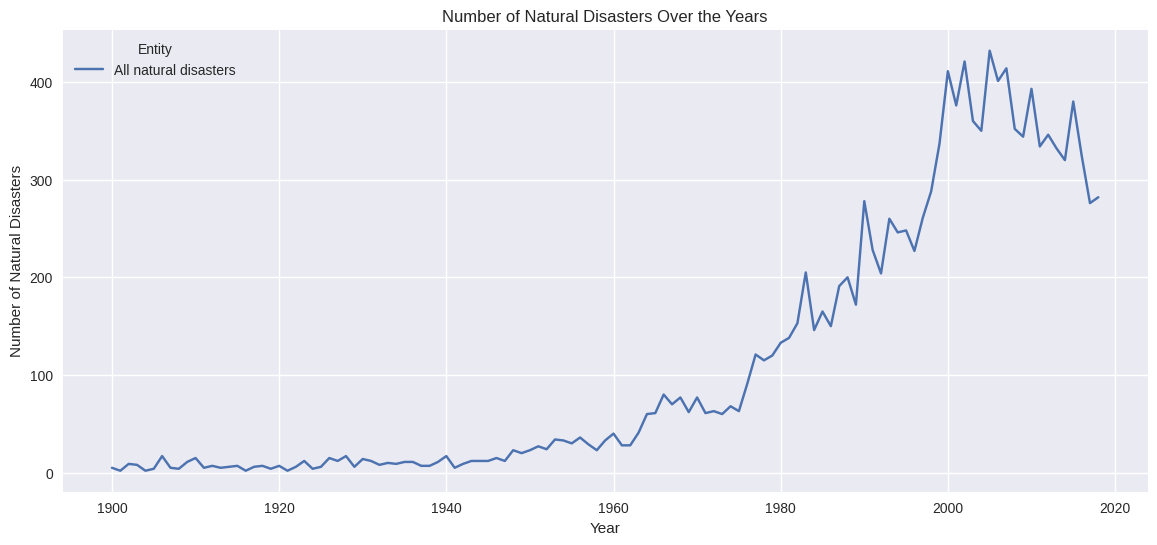

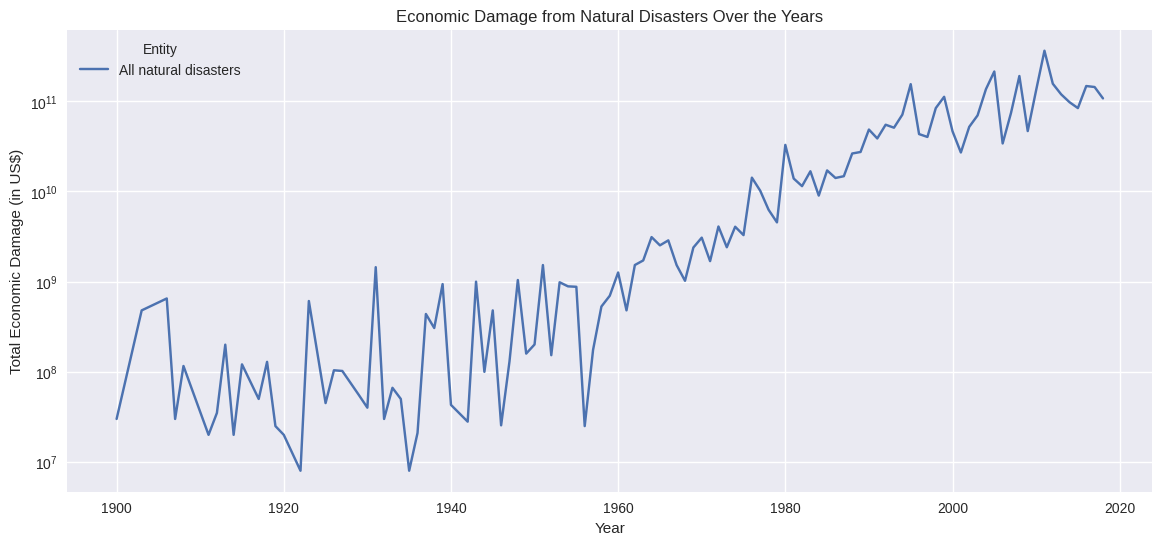

In [ ]:
plt.style.use("seaborn-v0_8")

# Natural disasters
plt.figure(figsize=(14, 6))
sns.lineplot(data=data1_clean, x='Year', y='Number of reported natural disasters (reported disasters)', hue='Entity')
plt.title("Number of Natural Disasters Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Natural Disasters")
plt.show()

# Jarak antar visualisasi
print()

# Economic damage
plt.figure(figsize=(14, 6))
sns.lineplot(data=data2_clean, x='Year', y='Total economic damage from natural disasters (US$)', hue='Entity')
plt.title("Economic Damage from Natural Disasters Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Economic Damage (in US$)")
plt.yscale('log')  # Gunakan skala logaritmik
plt.show()

## **Statistical Modeling**
Karena kedua dataset memiliki kolom yang sama 'Entity' dan 'Year', dapat menggabungkannya berdasarkan kolom-kolom ini. Ini akan memungkinkan mengaitkan jumlah bencana alam yang dilaporkan dengan kerusakan ekonomi mereka.

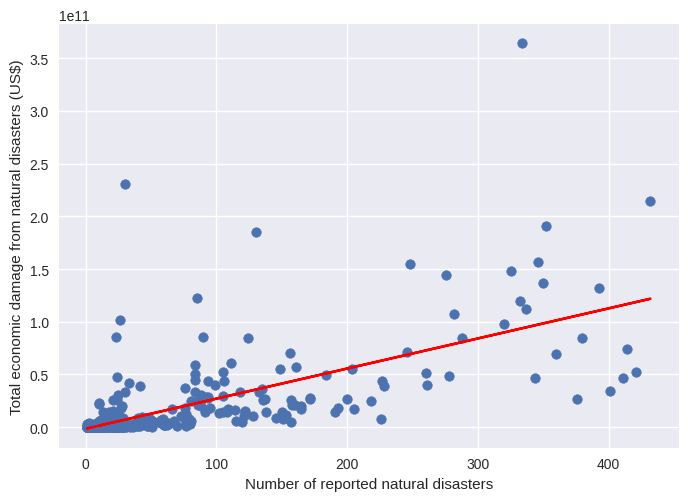

In [ ]:
from sklearn.linear_model import LinearRegression

# Menggabungkan dataset
merged_data = pd.merge(data1, data2, on=['Entity', 'Year'])

# Menampilkan dataset yang digabungkan
plt.scatter(merged_data['Number of reported natural disasters (reported disasters)'], merged_data['Total economic damage from natural disasters (US$)'])
plt.xlabel('Number of reported natural disasters')
plt.ylabel('Total economic damage from natural disasters (US$)')

# Melakukan fitting model regresi linear ke data
x = merged_data[['Number of reported natural disasters (reported disasters)']]
y = merged_data['Total economic damage from natural disasters (US$)']
model = LinearRegression().fit(x, y)

# Menambahkan garis regresi linear ke dalam plot
plt.plot(x, model.predict(x), color='red')

# **Part 3: Data Product Development**

Pengembangan Produk Data (Dashboard). Buatlah dashboard yang menampilkan:
1. Tren historis untuk semua jenis Natural Disasters dan Economic Damage.
2. Model prediktif untuk Disasters dan Economic Damage di masa depan.
3. Ringkasan tahunan.

Gunakan Google Data Studio.

### **Looker Studio URL** (View Mode)

https://lookerstudio.google.com/reporting/bb200b66-d1ce-4d83-bf9c-4f5155e49900

### **Dashboard Screenshots** (from Looker Studio URL on View Mode)

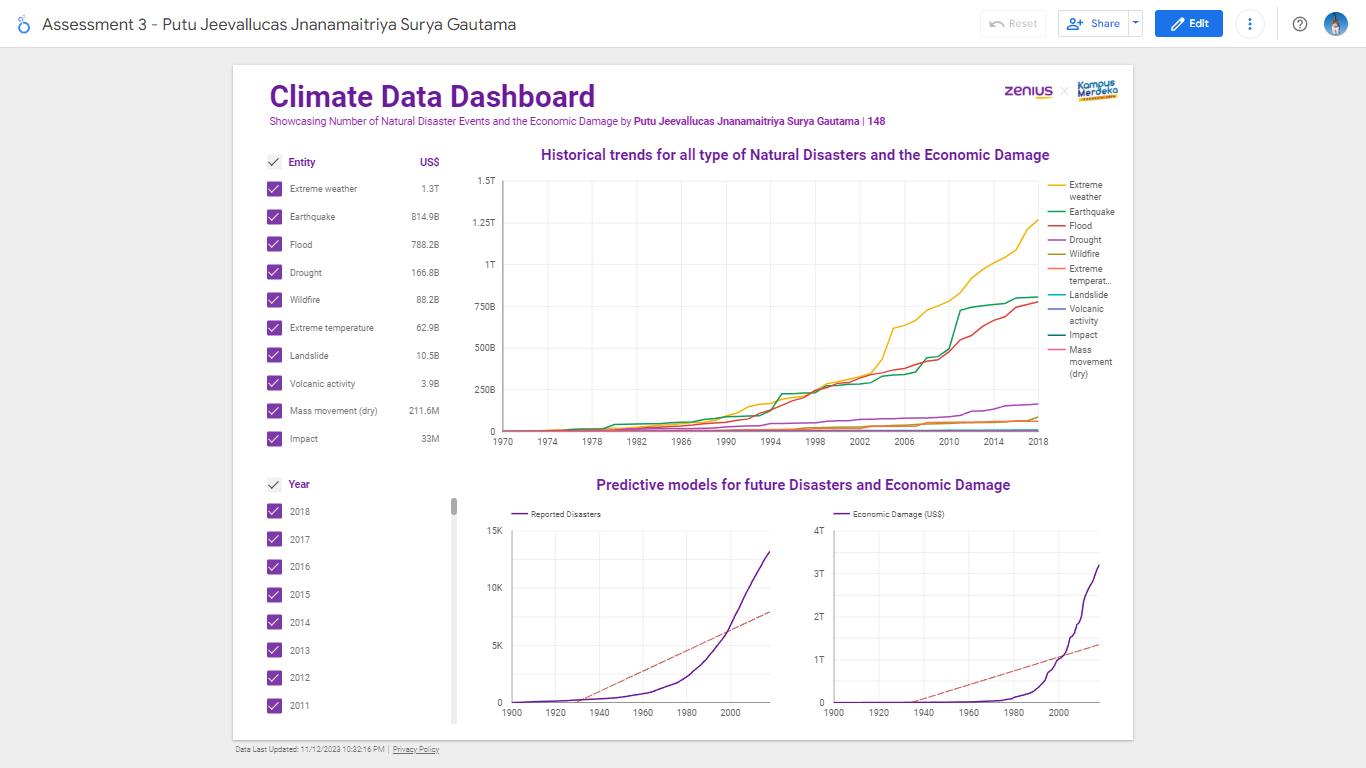

# **Part 4: Making Impact with Data Science**

Analisis Natural Disasters dan Economic Damage memberikan wawasan berharga yang dapat memberikan kontribusi signifikan pada perubahan masyarakat dalam konteks iklim. Temuan dari dataset ini menyoroti tren, pola, dan area potensial untuk intervensi, memungkinkan pengambilan keputusan yang berbasis informasi dalam strategi mitigasi dan adaptasi. Laporan ini membahas observasi kunci dan mengusulkan strategi untuk mengatasi tantangan yang dihadapi oleh bencana alam terkait iklim.

## **Temuan Utama**
1. **Tren Historis**<br>
Tren historis yang diekstraksi dari dataset mengungkap informasi penting tentang frekuensi dan keparahan bencana alam. Dengan meneliti jumlah bencana alam dan kerusakan ekonomi dari tahun ke tahun, menjadi jelas bahwa beberapa periode mengalami tingkat bencana yang lebih tinggi, menunjukkan variasi iklim potensial. Mengidentifikasi tren ini penting untuk memahami sifat berkembang tantangan terkait iklim.

2. **Model Prediktif**<br>
Model prediktif yang dikembangkan untuk meramalkan bencana masa depan dan kerusakan ekonomi menawarkan pendekatan proaktif terhadap perubahan iklim. Dengan memanfaatkan model statistik dan algoritma pembelajaran mesin, prediksi ini dapat membantu pembuat kebijakan, tim tanggap bencana, dan komunitas dalam mempersiapkan diri menghadapi peristiwa potensial. Peringatan dini dan kesiapsiagaan yang efektif dapat signifikan mengurangi dampak manusia dan ekonomi dari bencana.

3. **Ringkasan Tahunan**<br>
Ringkasan tahunan memberikan gambaran menyeluruh tentang dampak bencana alam setiap tahun. Dengan menganalisis data tahunan, para pengambil keputusan dapat mengidentifikasi tahun-tahun tertentu dengan tingkat kejadian bencana yang sangat tinggi atau rendah, memfasilitasi intervensi yang ditargetkan. Selain itu, ringkasan kerusakan ekonomi menyoroti implikasi keuangan dari bencana, membimbing alokasi sumber daya dan perencanaan keuangan untuk manajemen bencana.

## **Strategi untuk Perubahan Sosial**
1. **Strategi Mitigasi**<br>
a. **Pengembangan Infrastruktur**<br>
Investasi dalam infrastruktur tangguh dapat mengurangi dampak bencana alam. Dengan membangun bangunan, jalan, dan utilitas yang tahan terhadap peristiwa cuaca ekstrem, komunitas dapat mengurangi kerusakan akibat bencana.<br>
b. **Reforestasi dan Konservasi Lingkungan**<br>
Mendorong upaya reforestasi dan konservasi lingkungan dapat membantu mitigasi perubahan iklim. Ekosistem yang sehat berfungsi sebagai penghalang alamiah terhadap bencana, seperti banjir dan tanah longsor, serta berkontribusi pada ketahanan iklim secara keseluruhan.

2. **Strategi Adaptasi**<br>
a. **Sistem Peringatan Dini**<br>
Peningkatan sistem peringatan dini berdasarkan model prediktif dapat meningkatkan kesiapsiagaan dan mengurangi kerugian jiwa dan properti. Komunitas yang memiliki akses ke informasi tepat waktu dan akurat dapat mengungsikan diri lebih awal, meminimalkan dampak bencana.<br>
b. **Pendidikan dan Pemberdayaan Masyarakat**<br>
Mendidik masyarakat tentang risiko bencana dan memberikan mereka alat untuk merespons secara efektif sangat penting. Memberdayakan masyarakat untuk mengambil langkah-langkah proaktif, seperti mengembangkan rencana evakuasi dan membentuk tim tanggap lokal, memperkuat ketahanan.

3. **Rekomendasi Kebijakan**<br>
a. **Kebijakan Climate-Resilient**<br>
Pemerintah seharusnya memprioritaskan pengembangan dan implementasi kebijakan tahan iklim. Ini termasuk kode bangunan yang mempertimbangkan risiko iklim, regulasi zonasi, dan insentif untuk bisnis mengadopsi praktik berkelanjutan.<br>
b. **Kolaborasi Internasional**<br>
Menanggapi perubahan iklim dan tantangan terkaitnya membutuhkan kolaborasi global. Negara seharusnya bekerja sama untuk berbagi data, sumber daya, dan keahlian dalam mengembangkan dan melaksanakan strategi efektif untuk mitigasi dan adaptasi terhadap bencana alam.

## **Kesimpulan**
Kombinasi analisis historis, pemodelan prediktif, dan strategi yang dapat diimplementasikan yang diuraikan dalam laporan ini memberikan dasar yang kuat untuk berkontribusi pada perubahan sosial dalam menghadapi tantangan terkait iklim. Dengan mengintegrasikan temuan ini ke dalam keputusan kebijakan, inisiatif komunitas, dan kolaborasi internasional, pemangku kepentingan dapat bekerja menuju masa depan yang lebih tangguh dan berkelanjutan.